### Librerías


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

### Cargar datos


In [2]:
df = pd.read_csv('data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Explorar datos


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 33)

In [5]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

La variable objetivo es diagnosis. Puede ser M de maligno o B de benigno. Podríamos cambiarlo por un bool (maligno o no).

La variable id no nos sirve para el modelo, así que la eliminaremos.

La última columna solo tiene NaN. Hay que eliminarla.


### Limpiar


In [6]:
df.drop('id', axis=1, inplace=True)
df.shape

(569, 32)

In [7]:
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(569, 32)

In [9]:
df.isnull().sum()[df.isnull().sum() != 0]

Unnamed: 32    569
dtype: int64

In [10]:
df.dropna(how='all', axis='columns', inplace=True)
df.shape

(569, 31)

### Correlaciones


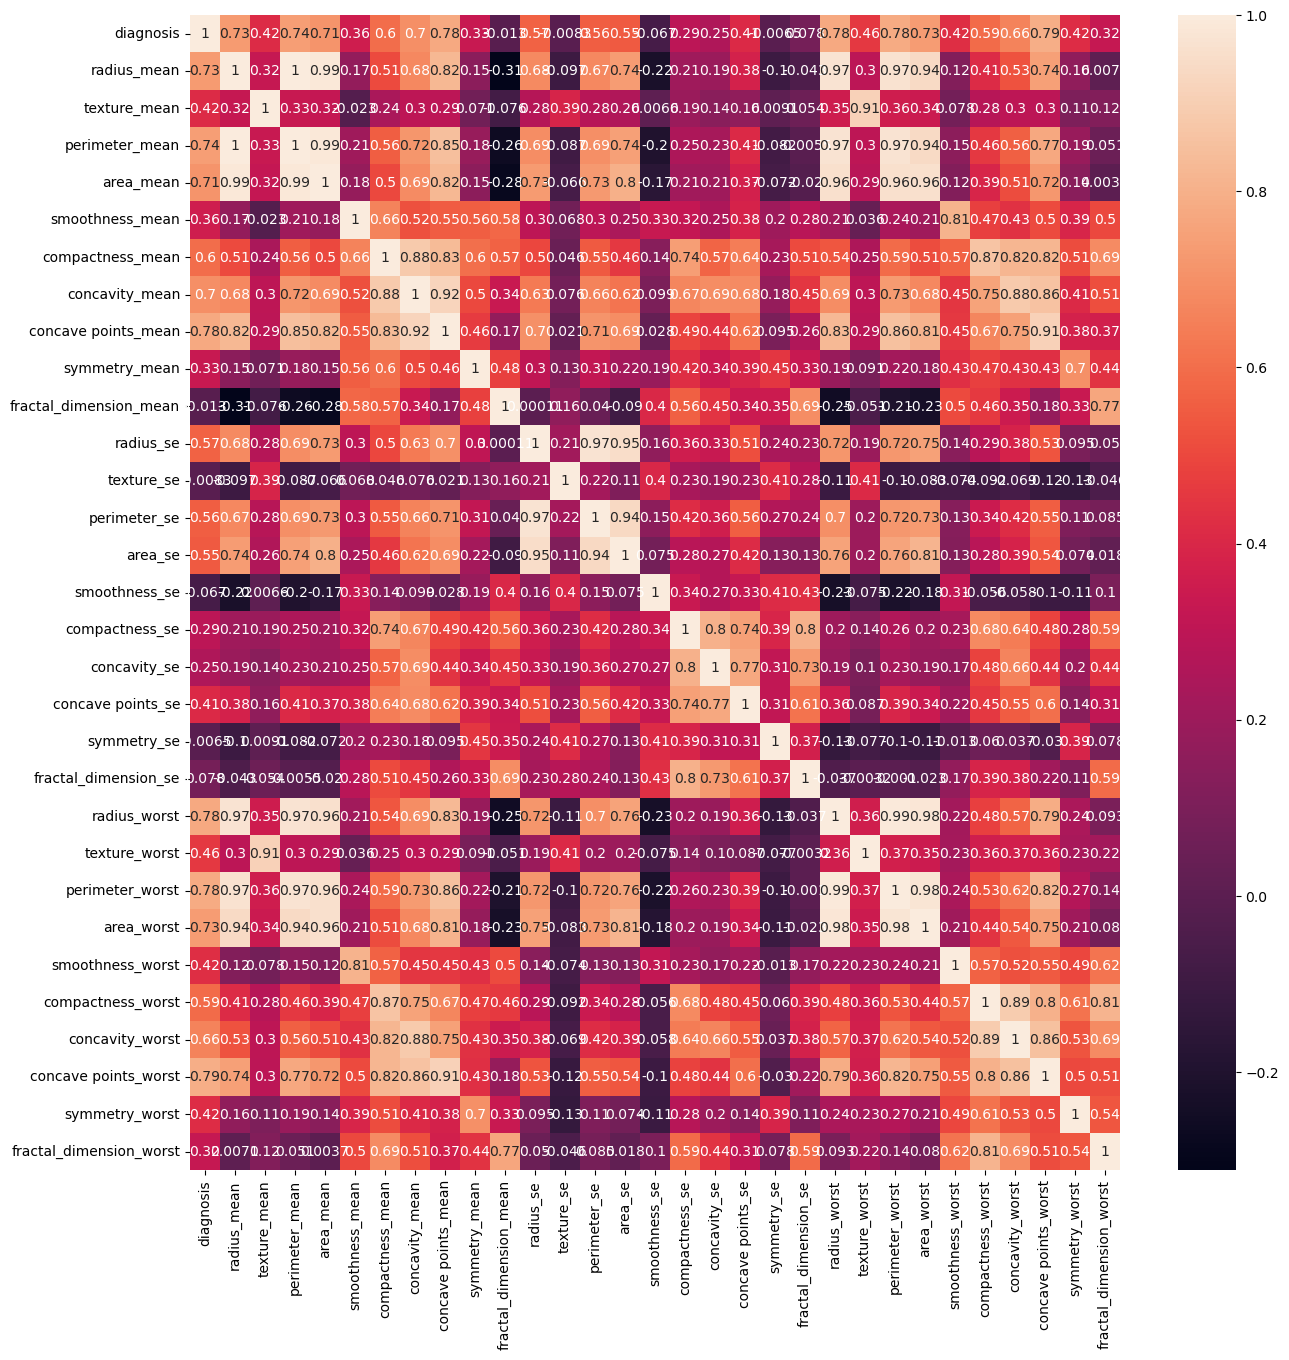

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Split y escalamiento


In [12]:
x = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True)

In [14]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

### Entrenar y evaluar modelo


In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, predictions)}')

Accuracy Score: 0.9824561403508771


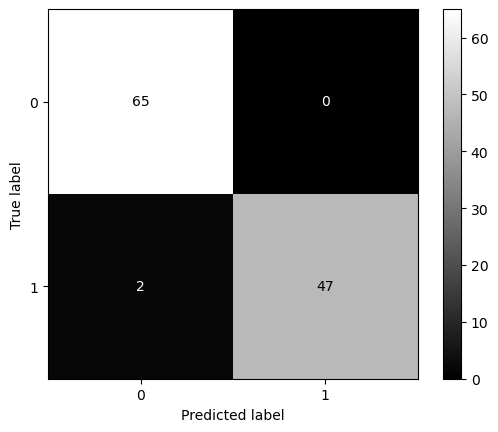

In [16]:
cm = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap='gray')
plt.show()

### Conclusiones

- El modelo consiguió una precisión de aprox. 98.24%
- Con el set de prueba solo se equivoco dos veces.
